In [1]:
#export
include("./utilities.jl")
using Glob, Random

* opening images
* batching images
* image augmentation

In [2]:
#export
loadimgpaths(path::String) = glob("*/*/*.dcm", path)
path2id(imgpath::String) = match(r"(?<=\/).[^\/]+(?=.dcm)", imgpath).match
id2mask(id, csv) = csv[findfirst(x->x==id, csv[:, 1]), 2]

id2mask (generic function with 1 method)

In [3]:
rle = CSV.read("./data/train-test/train-rle.csv")
imgpaths = shuffle(loadimgpaths("data/train-test/dicom-images-train"));

In [99]:
#export
function batch(imgpaths, csv; imsize=nothing)
    imgs = opendcm.(imgpaths)
    
    masks = rle2mask.(id2mask.(path2id.(imgpaths), [csv]), [size(imgs[1])])
    if !isnothing(imsize)
        imgs = imresize.(imgs, [imsize])
        masks = imresize.(masks, [imsize])
    end
    return Float64.(cat(imgs..., dims=4)), Bool.(ceil.(cat(masks..., dims=4)))
end

batch (generic function with 1 method)

In [120]:
#export
dataloader(imgpaths, csv, bs; imsize=nothing) = (batch(imgpaths, csv, imsize=imsize) for imgpaths in Iterators.partition(imgpaths, bs))

dataloader (generic function with 1 method)

In [117]:
loader = dataloader(imgpaths, rle, 10);

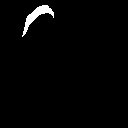

In [118]:
Gray.(first(loader)[2][:, :, 1, 2])

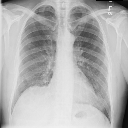

In [119]:
Gray.(first(loader)[1][:, :, 1, 2])

In [97]:
using Flux, CuArrays

In [123]:
J = []
@time for i in ceil.(first(loader)[2])
    if !(i ∈ J)
        push!(J, i)
        println(i)
    end
end

false
true
  1.465148 seconds (709.91 k allocations: 231.013 MiB, 2.66% gc time)


 12.854975 seconds (158.89 k allocations: 319.616 MiB, 2.09% gc time)


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

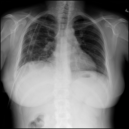
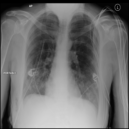
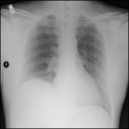
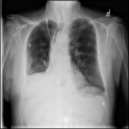
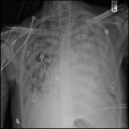
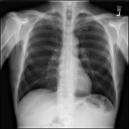
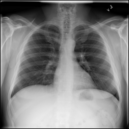
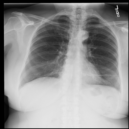
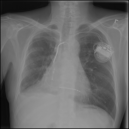
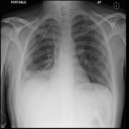
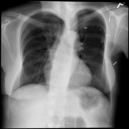
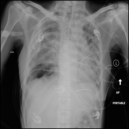
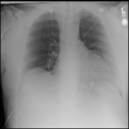
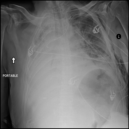
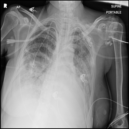
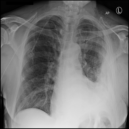
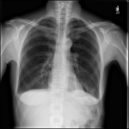
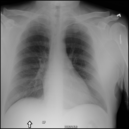
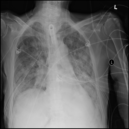
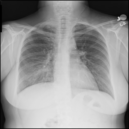
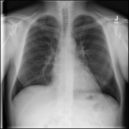
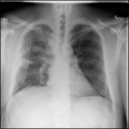
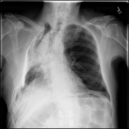
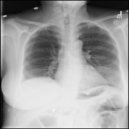
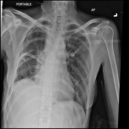
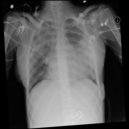
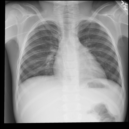
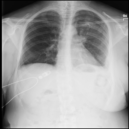
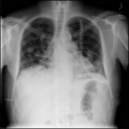
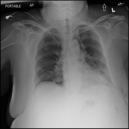
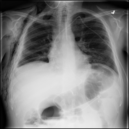
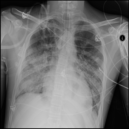
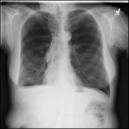
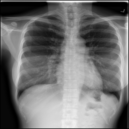
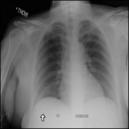
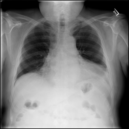
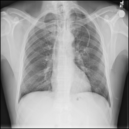
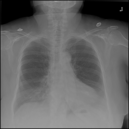
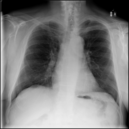
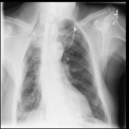
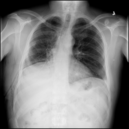
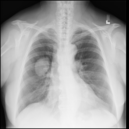
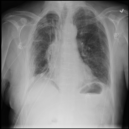
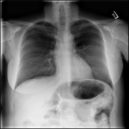
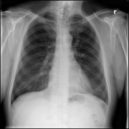
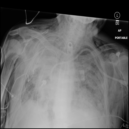
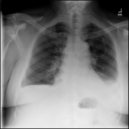
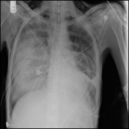
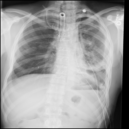
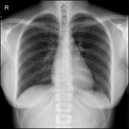
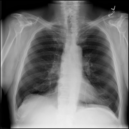
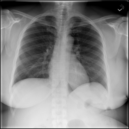
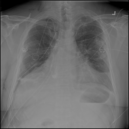
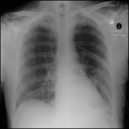
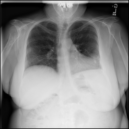
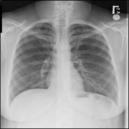
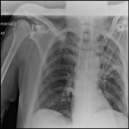
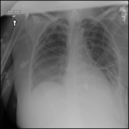
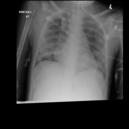
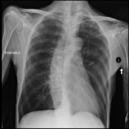
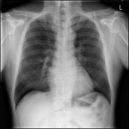
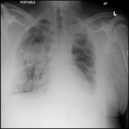
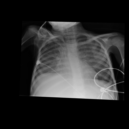
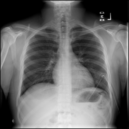
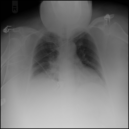
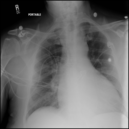
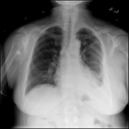
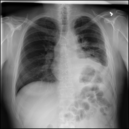
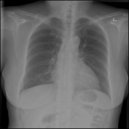
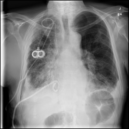
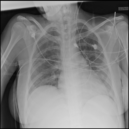
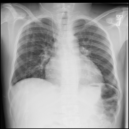
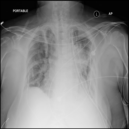
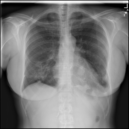
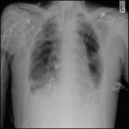
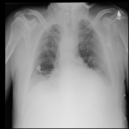
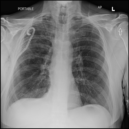
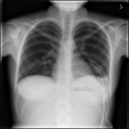
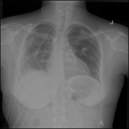
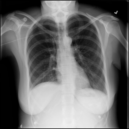
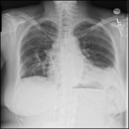
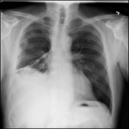
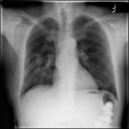
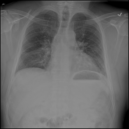
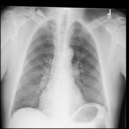
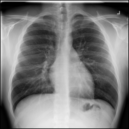
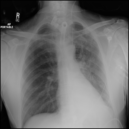
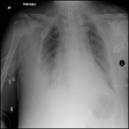
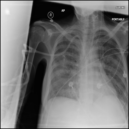
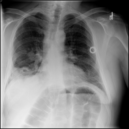
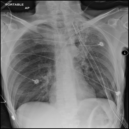
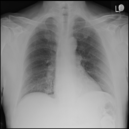
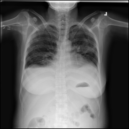
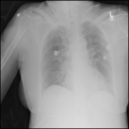
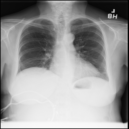
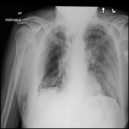
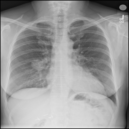
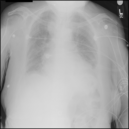
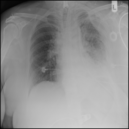
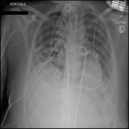

In [77]:
@time opendcm.(imgpaths[1:100])

In [121]:
notebook2script("/code/kaggle/data.ipynb")

In [10]:
imgpaths

10712-element Array{String,1}:
 "data/train-test/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.366.1517875162.573450/1.2.276.0.7230010.3.1.3.8323329.366.1517875162.573449/1.2.276.0.7230010.3.1.4.8323329.366.1517875162.573451.dcm"      
 "data/train-test/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.10815.1517875225.754601/1.2.276.0.7230010.3.1.3.8323329.10815.1517875225.754600/1.2.276.0.7230010.3.1.4.8323329.10815.1517875225.754602.dcm"
 "data/train-test/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.1555.1517875168.395267/1.2.276.0.7230010.3.1.3.8323329.1555.1517875168.395266/1.2.276.0.7230010.3.1.4.8323329.1555.1517875168.395268.dcm"   
 "data/train-test/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2760.1517875174.575283/1.2.276.0.7230010.3.1.3.8323329.2760.1517875174.575282/1.2.276.0.7230010.3.1.4.8323329.2760.1517875174.575284.dcm"   
 "data/train-test/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.1665.1517875168.814836/1.2.276.0.7230010.3.1.3.8323329.1665.

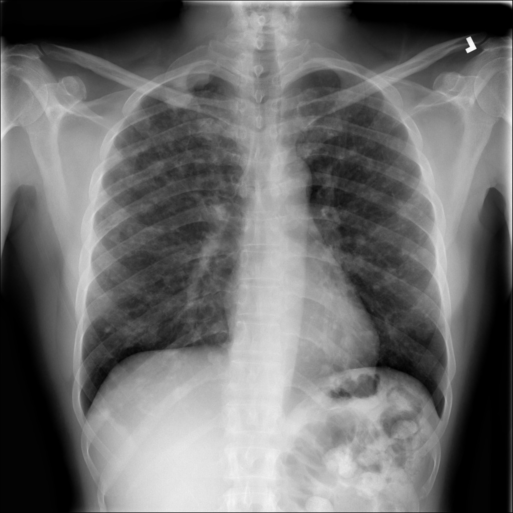

In [18]:
img = opendcm(imgpaths[1])

  0.142793 seconds (1.62 k allocations: 6.233 MiB)


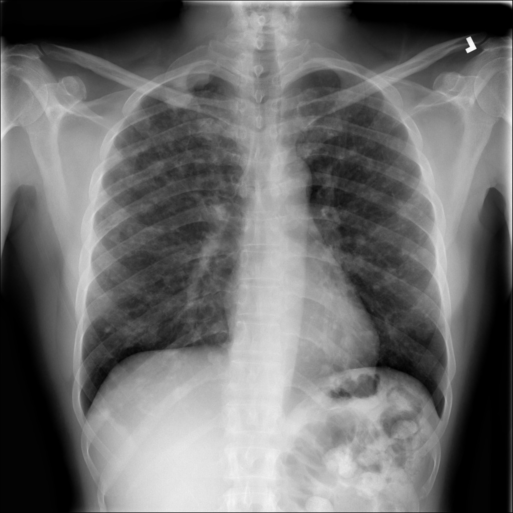

In [24]:
@time restrict(opendcm(imgpaths[1]))

In [88]:
?imresize

search: imresize imcorner_subpixel setimagecompression



```
imresize(img, sz) -> imgr
imresize(img, inds) -> imgr
imresize(img; ratio) -> imgr
```

Change `img` to be of size `sz` (or to have indices `inds`). If `ratio` is used, then `sz = ceil(Int, size(img).*ratio)`. This interpolates the values at sub-pixel locations. If you are shrinking the image, you risk aliasing unless you low-pass filter `img` first.

# Examples

```julia
julia> img = testimage("lena_gray_256") # 256*256
julia> imresize(img, 128, 128) # 128*128
julia> imresize(img, 1:128, 1:128) # 128*128
julia> imresize(img, (128, 128)) # 128*128
julia> imresize(img, (1:128, 1:128)) # 128*128
julia> imresize(img, (1:128, )) # 128*256
julia> imresize(img, 128) # 128*256
julia> imresize(img, ratio = 0.5) # 128*128

σ = map((o,n)->0.75*o/n, size(img), sz)
kern = KernelFactors.gaussian(σ)   # from ImageFiltering
imgr = imresize(imfilter(img, kern, NA()), sz)
```

See also [`restrict`](@ref).


  0.005920 seconds (10 allocations: 1.251 MiB)


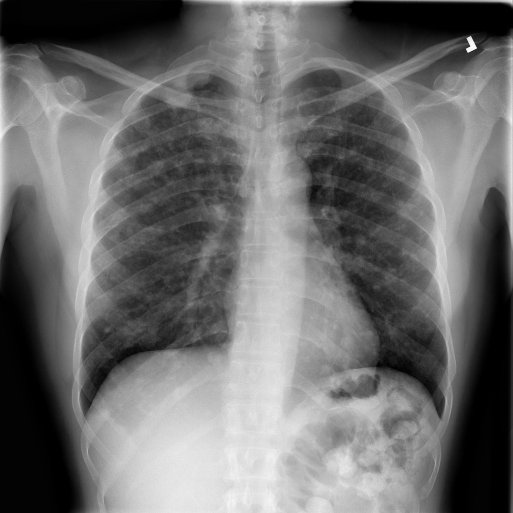

In [26]:
@time imresize(img, (513, 513))